<a href="https://colab.research.google.com/github/shivangitiwari0411/Customer_Segmentation_KMeans/blob/main/Customer_Segmentation_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving Mall_Customers.csv to Mall_Customers.csv


In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("Mall_Customers.csv")
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Check structure
df.info()

# Check for missing values
df.isnull().sum()

# Describe numerical data
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [7]:
from sklearn.cluster import KMeans

# Try with 5 clusters (initially)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to DataFrame
df['Cluster'] = kmeans.labels_

df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


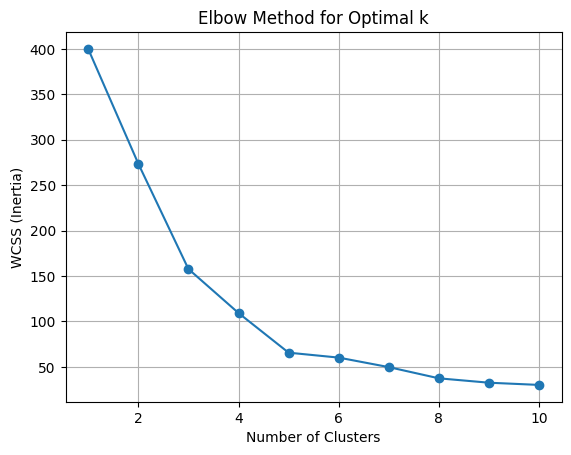

In [8]:
wcss = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

# Plot elbow curve
import matplotlib.pyplot as plt

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


In [9]:
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    score = silhouette_score(X_scaled, km.labels_)
    print(f'k = {k}, silhouette score = {score:.3f}')


k = 2, silhouette score = 0.397
k = 3, silhouette score = 0.467
k = 4, silhouette score = 0.494
k = 5, silhouette score = 0.555
k = 6, silhouette score = 0.514
k = 7, silhouette score = 0.502
k = 8, silhouette score = 0.455
k = 9, silhouette score = 0.457
k = 10, silhouette score = 0.445


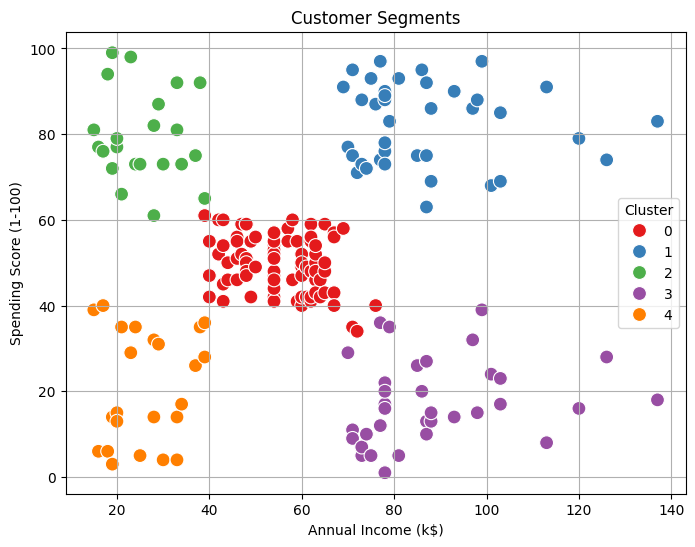

In [10]:
import seaborn as sns

# Plot clusters using original features
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1', s=100)
plt.title("Customer Segments")
plt.grid(True)
plt.show()


In [11]:
df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Annual Income (k$),Spending Score (1-100)
Cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


In [12]:
import pandas as pd

# Define the data
data = {
    'Cluster': [0, 1, 2, 3, 4],
    'Type of Customers': [
        'Rich but Frugal',
        'Low Income, High Spending',
        'High Income, High Spending',
        'Low Income, Low Spending',
        'Balanced Customers'
    ],
    'Strategy Suggestion': [
        'Luxury discounts, prestige perks',
        'Budget offers, loyalty cashbacks',
        'VIP memberships, premium upgrades',
        'Mass promotions, awareness ads',
        'Nudge with combos, mild promotions'
    ],
    'Label': [
        'The Cautious Rich',
        'Value Seekers',
        'Premium Spenders',
        'Low Engagement',
        'Balanced Buyers'
    ]
}

# Create the DataFrame
strategy_df = pd.DataFrame(data)

# Display the table
strategy_df


,Cluster,Type of Customers,Strategy Suggestion,Label
0,0,Rich but Frugal,"Luxury discounts, prestige perks",The Cautious Rich
1,1,"Low Income, High Spending","Budget offers, loyalty cashbacks",Value Seekers
2,2,"High Income, High Spending","VIP memberships, premium upgrades",Premium Spenders
3,3,"Low Income, Low Spending","Mass promotions, awareness ads",Low Engagement
4,4,Balanced Customers,"Nudge with combos, mild promotions",Balanced Buyers
